# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Explore unknown JSON schemas
* Access and manipulate data inside a JSON file
* Convert JSON to alternative data formats

## Loading the JSON file

Load the data from the file disease_data.json.

In [2]:
#Your code here 
import json
import pandas as pd
f=open('disease_data.json')
data=json.load(f)

## Explore the first and second levels of the schema hierarchy

In [3]:
#Your code here
type(data)

dict

In [4]:
data.keys()

dict_keys(['meta', 'data'])

In [5]:
for key in data:
    print(key,type(data[key]))

meta <class 'dict'>
data <class 'list'>


In [6]:
data['meta'].keys()

dict_keys(['view'])

In [46]:
def explore_json(dataset,level=None):
    if level==None:
        level=0
        explore_json(dataset,level)
    elif type(dataset)==dict:
        level+=1
        print(dataset.keys())
        for key in dataset:
            print(f"Key: {key}, Type: {type(key)}, Level: {level}")
            print("---------------")
            explore_json(dataset[key],level)
    else:
        return

In [47]:
explore_json(data)

dict_keys(['meta', 'data'])
Key: meta, Type: <class 'str'>, Level: 1
---------------
dict_keys(['view'])
Key: view, Type: <class 'str'>, Level: 2
---------------
dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])
Key: id, Type: <class 'str'>, Level: 3
---------------
Key: name, Type: <class 'str'>, Level: 3
---------------
Key: attribution, Type: <class 'str'>, Level: 3
---------------
Key: attributionLink, Type: <class 'str'>, Level: 3
---------------
Key: ave

In [81]:
data['data'][0]

[1,
 'FF49C41F-CE8D-46C4-9164-653B1227CF6F',
 1,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016',
 '2016',
 'US',
 'United States',
 'BRFSS',
 'Alcohol',
 'Binge drinking prevalence among adults aged >= 18 years',
 None,
 '%',
 'Crude Prevalence',
 '16.9',
 '16.9',
 '*',
 '50 States + DC: US Median',
 '16',
 '18',
 'Overall',
 'Overall',
 None,
 None,
 None,
 None,
 [None, None, None, None, None],
 None,
 '59',
 'ALC',
 'ALC2_2',
 'CRDPREV',
 'OVERALL',
 'OVR',
 None,
 None,
 None,
 None]

In [82]:
data['meta']

{'view': {'id': 'g4ie-h725',
  'name': 'U.S. Chronic Disease Indicators (CDI)',
  'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health',
  'attributionLink': 'http://www.cdc.gov/nccdphp/dph/',
  'averageRating': 0,
  'category': 'Chronic Disease Indicators',
  'createdAt': 1463517008,
  'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.",
  'displayType': 'table',
  'downloadCount': 80068,
  'hideFromCatalog': False,
  

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [83]:
#Your code here
df = pd.DataFrame(data['data'])
df.columns = [item['name'] for item in data['meta']['view']['columns']]
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [102]:
df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [103]:
df.Topic.value_counts()

Diabetes                                           9895
Chronic Obstructive Pulmonary Disease              6960
Overarching Conditions                             5589
Arthritis                                          5220
Tobacco                                            4730
Asthma                                             4675
Nutrition, Physical Activity, and Weight Status    4188
Alcohol                                            4130
Oral Health                                        3480
Cardiovascular Disease                             3480
Cancer                                             2495
Older Adults                                       1740
Mental Health                                      1195
Immunization                                        870
Chronic Kidney Disease                              870
Disability                                          424
Reproductive Health                                 325
Name: Topic, dtype: int64

In [104]:
asthma_df=df.loc[df['Topic']=='Asthma']
asthma_df.LocationAbbr.head()

4725    IL
5529    IN
5632    IA
6777    KS
7034    KY
Name: LocationAbbr, dtype: object

In [105]:
asthma_df.Question.value_counts()

Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    870
Current asthma prevalence among adults aged >= 18 years                                    870
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    870
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       870
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       870
Asthma prevalence among women aged 18-44 years                                             325
Name: Question, dtype: int64

In [106]:
asthma_df=asthma_df.loc[asthma_df['Question']=='Current asthma prevalence among adults aged >= 18 years']

In [118]:
asthma_df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [119]:
asthma_df=asthma_df[['LocationAbbr','DataValue']]

In [126]:
asthma_df.DataValue=asthma_df.DataValue.astype('float64')

In [131]:
new_df=asthma_df.groupby('LocationAbbr').sum()
new_df.head()

,DataValue
LocationAbbr,
AK,92.4
AL,143.8
AR,86.1
AZ,143.4
CA,130.1


In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
new_df.sort_values('DataValue',inplace=True)

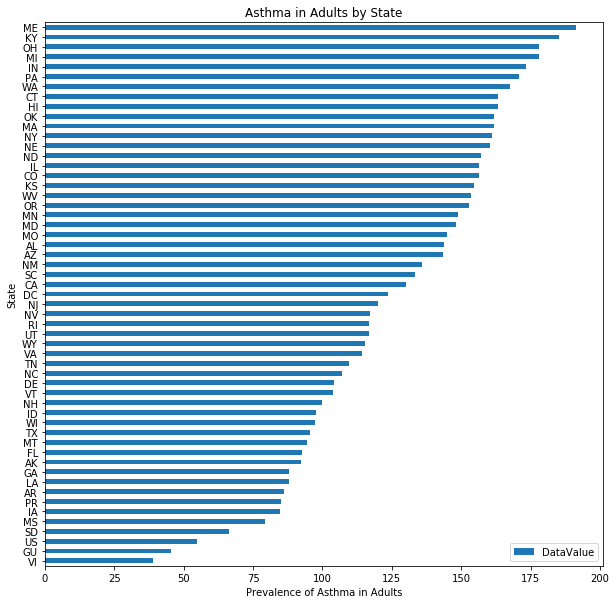

In [146]:
new_df.plot(kind='barh', figsize=(10,10))
plt.xlabel("Prevalence of Asthma in Adults")
plt.ylabel("State")
plt.title("Asthma in Adults by State");

## Level-Up!
## Create a function (or class) that returns an outline of the schema structure like this: 
<img src="images/outline.jpg" width="350">

Rules:
* Your outline should follow the numbering outline above (I, A, 1, a, i).
* Your outline should be properly indented! (Four spaces or one tab per indentation level.)
* Your function goes to at least a depth of 5 (Level-up: create a parameter so that the user can specify this)
* If an entry is a dictionary, list its keys as the subheadings
* After listing a key name (where applicable) include a space, a dash and the data type of the entry
* If an entry is a dict or list put in parentheses how many items are in the entry
* lists will not have key names for their entries (they're just indexed)
* For subheadings of a list, state their datatypes. 
* If a dictionary or list is more then 5 items long, only show the first 5 (we want to limit our previews); make an arbitrary order choice for dictionaries. (Level-up: Parallel to above; allow user to specify number of items to preview for large subheading collections.)

In [ ]:
# Your code here; you will probably want to define subfunctions.
def print_obj_outline(json_obj):
    return outline

In [22]:
outline = print_obj_outline(data)

In [23]:
print(outline) #Your function should produce the following output for this json object (and work for all json files!)

I. root - <class 'dict'> (2 items)
    A. meta <class 'dict'> (1 items)
        1. view <class 'dict'> (40 items)
            a. id <class 'str'> 
            b. name <class 'str'> 
            c. attribution <class 'str'> 
            d. attributionLink <class 'str'> 
            e. averageRating <class 'int'> 
    B. data <class 'list'> (60266 items)
        1. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        2. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        3. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        4. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <c

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files and writing a recursive generalized function for outlining a JSON file's schema! 